In [44]:
import pandas as pd
import pickle

best_model = pickle.load(open('../models/cheap_features/ridge_2.pkl', 'rb'))

In [45]:
import os

folder_loc = '../data/processed/cheap_features/'
datasets = os.listdir('../data/processed/cheap_features/')
target = 'ahi_c0h4'

In [46]:
dataset = 'Ant_Dem_Lif.csv'
# dataset = 'Ant_Cli_Med_Tre.csv'

In [47]:
from utils import split_data

df = pd.read_csv(folder_loc + dataset)

features = best_model.feature_names_in_
# features.remove(target)

# Split data
X_train, X_test, y_train, y_test, X_val, y_val = split_data(df, features, target)

In [48]:
best_model.feature_names_in_

array(['gender', 'race', 'mstat', 'hip', 'neck20', 'coffee15', 'tea15',
       'soda15', 'evsmok15', 'smknow15', 'asa15', 'age_s1', 'smokstat_s1',
       'ethnicity', 'bmi_s1', 'educat', 'weight', 'waist', 'height',
       'weight20', 'age_category_s1'], dtype=object)

In [49]:
feature_explanation = pd.read_csv('../references/shhs-data-dictionary-0.20.0-variables.csv')

In [50]:
# Get the rows that folder starts with Anthropometry and Lifestyle and Behavioral Health/SHHS1
# feature_explanation[feature_explanation['folder'].str.startswith('Anthropometry') | feature_explanation['folder'].str.startswith('Lifestyle and Behavioral Health/SHHS1') | feature_explanation['folder'].str.startswith('Dem')].to_excel('./res.xlsx')

In [84]:
column_rename = {
    'bmi_s1': 'Body Mass Index',
    'height': 'Height',
    'weight20': 'Weight',
    'weight': 'Weight',
    'waist': 'Waist Circumference',
    'neck20': 'Neck Circumference',
    'hip': 'Hip Circumference',
    'coffee15': 'Coffee Intake',
    'tea15': 'Tea Intake',
    'soda15': 'Soda Intake',
    'smknow15': 'Smoking Status Now',
    'evsmok15': 'Smoking Status Ever',
    'smokstat_s1': 'Smoking Status',
    'asa15': 'Aspirin Intake',
    'gender': 'Gender',
    'race': 'Race',
    'age_s1': 'Age',
    'ethnicity': 'Ethnicity',
    'educat': 'Education',
    'mstat': 'Merital Status',
    'age_category_s1': 'Age Category',
}


In [52]:
features_best = [column_rename.get(n, n) for n in best_model.feature_names_in_]

In [53]:
# rename the columns keep the order
best_model.feature_names_in_ = [column_rename.get(n, n) for n in best_model.feature_names_in_]

In [54]:
best_model.feature_names_in_

['Gender',
 'Race',
 'Merital Status',
 'Hip Circumference',
 'Neck Circumference',
 'Coffee Intake',
 'Tea Intake',
 'Soda Intake',
 'Smoking Status Ever',
 'Smoking Status Now',
 'Aspirin Intake',
 'Age',
 'Smoking Status',
 'Ethnicity',
 'Body Mass Index',
 'Education',
 'weight',
 'Waist Circumference',
 'Height',
 'Weight',
 'Age Category']

In [56]:
# shap.plots.waterfall(shap_values[20], max_display=14)

In [72]:
[column_rename.get(n, n) for n in X_train.columns]

['Gender',
 'Race',
 'Merital Status',
 'Hip Circumference',
 'Neck Circumference',
 'Coffee Intake',
 'Tea Intake',
 'Soda Intake',
 'Smoking Status Ever',
 'Smoking Status Now',
 'Aspirin Intake',
 'Age',
 'Smoking Status',
 'Ethnicity',
 'Body Mass Index',
 'Education',
 'weight',
 'Waist Circumference',
 'Height',
 'Weight',
 'Age Category']

In [85]:
# rename columns of X_train and X_test
X_train.columns = [column_rename.get(n, n) for n in X_train.columns]# if n in column_rename.keys()]
X_test.columns = [column_rename.get(n, n) for n in X_test.columns]#s if n in column_rename.keys()] 

In [86]:
# Split data
import shap

# X_train, X_test, y_train, y_test, X_val, y_val = split_data(df, features, target)

# model = Ridge(alpha=4.434528937795567, random_state=1, solver="sparse_cg")
# model.fit(X_train, y_train)

# create an explainer
explainer = shap.LinearExplainer(best_model, X_train)
# shap_values_test = explainer.shap_values(X_test)
shap_values_test = explainer(X_test)

In [87]:
# explainer_ebm = shap.Explainer(best_model.predict, X_test)
# shap_values_ebm = explainer_ebm(X_train)

In [1]:
# save shap values use pickle
import pickle
import shap
# with open('./shap_values_ebm.pkl', 'wb') as f:
#     pickle.dump(shap_values_test, f)

# load shap values

with open('./shap_values_ebm.pkl', 'rb') as f:
    shap_values_test = pickle.load(f)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


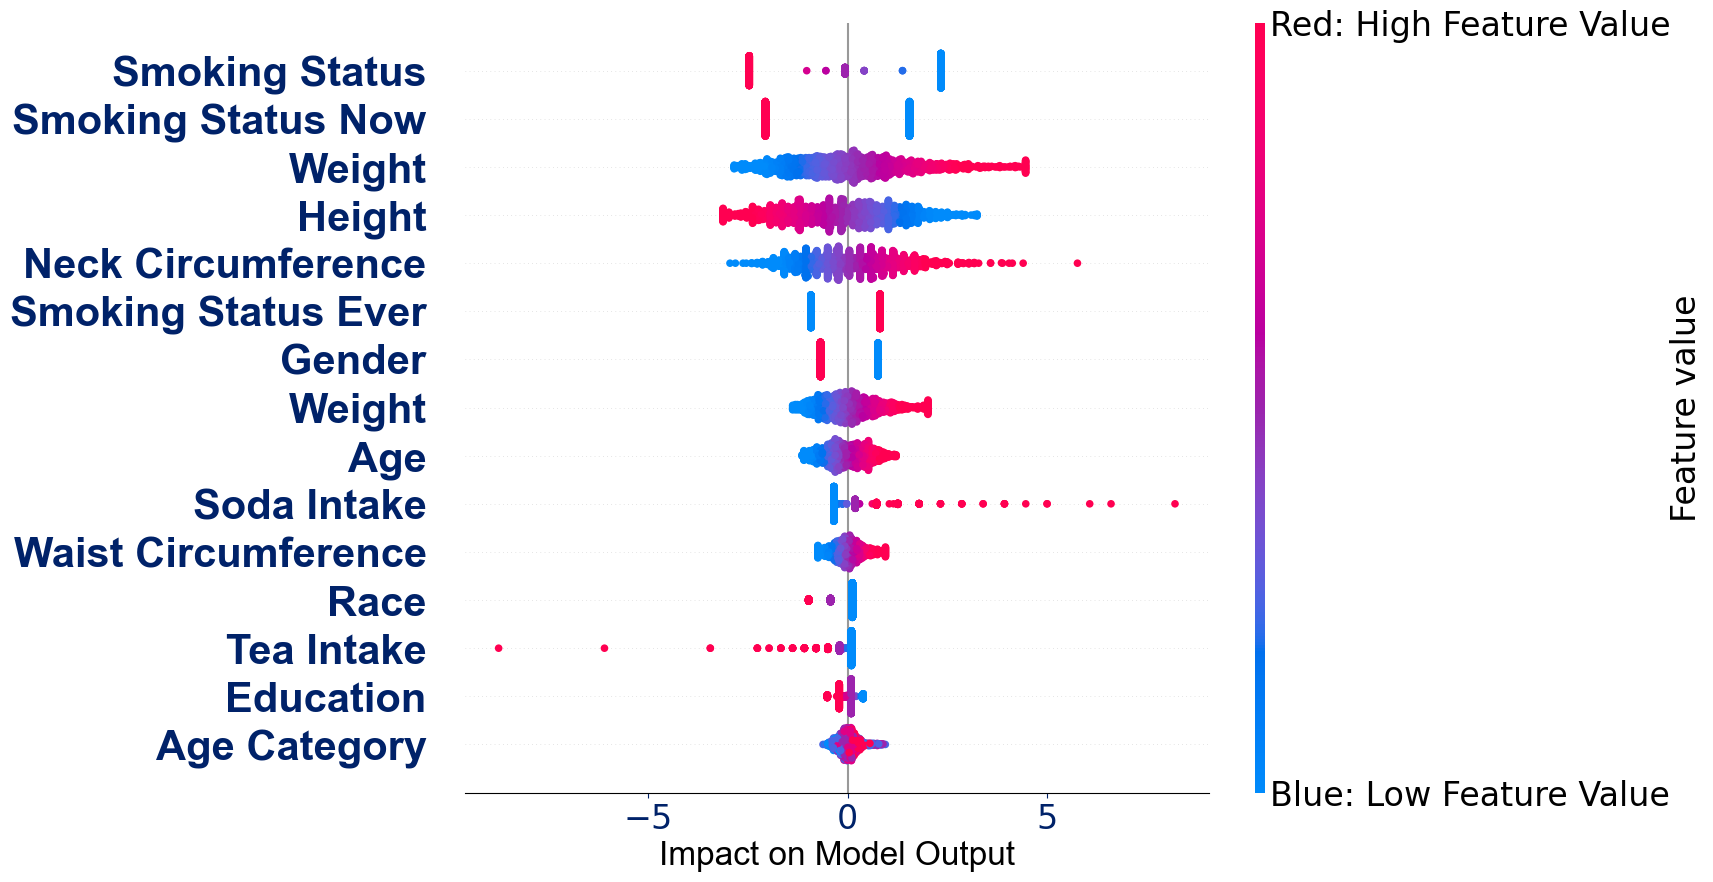

In [2]:
# make figure size bigger
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]

shap.plots.beeswarm(shap_values_test, max_display=15, axis_color='#002269', show=False, plot_size=(12, 10))